## **Importing the data**

In [45]:
# Importing pandas
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [46]:
# Loading in the data
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

In [47]:
#Review first 5 rows of the pulls_one df
pulls_one.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [48]:
#Review the shape of the pulls_one df
pulls_one.shape

(3296, 3)

In [49]:
#Review first 5 rows of the pulls_two df
pulls_two.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [50]:
#Review the shape of the pulls_one df
pulls_two.shape

(2904, 3)

In [51]:
#Review first 5 rows of the pull_files df
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [52]:
#Review the shape of the pull_files df
pull_files.shape

(85588, 2)

In [53]:
pull_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


**pulls_one** and **pulls_two** dataframes have similar column structures (**3** columns and same column name) which can be appended together.

**pull_files** dataframe on the other hand contains **85588** rows and **2** columns with primary key as **pid**.

## **Preparing and cleaning the data**
*   <p>The data from the two separate pull DataFrames will be combined. </p>
*   <p>The raw data extracted from GitHub contains dates in the ISO8601 format. However, <code>pandas</code> imports them as regular strings. The strings will be converted into Python's <code>DateTime</code> objects. 
*   <p>The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). All times will be converted to UTC to make comparisons easy.</p>



In [54]:
# Append pulls_one & pulls_two as one dataframe
pulls = pulls_one.append(pulls_two)

In [55]:
#Review the first 5 rows of pulls df
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [56]:
#Review the shape of the pulls df
pulls.shape

(6200, 3)

In [57]:
#View the info of combined dataframe
pulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 193.8+ KB


Although all rows from both dataframes have been appended, the date column is a string object and hence needs to be converted to datetime.

In [58]:
# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'])

In [59]:
#Review the datatype of the date column
pulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 193.8+ KB


## **Merging the DataFrames**
<p>The data extracted comes in two separate files. Merging the two DataFrames will make it easier to analyze the data in the future tasks.</p>

In [60]:
# Merge pull_files & pulls df to form master dataset
data = pulls.merge(pull_files, on ='pid')

In [61]:
#Review first 5 rows of master dataset
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


In [62]:
data.shape

(85588, 4)

The merged master dataframe consists of **85588** rows and **4** columns.

## **Data Analysis**

The data is analysed to answer different specific questions. This gives insight to the capacity of contributions made by each developer per file.

*  #### **Is the project still actively maintained?**


<p>Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. 

Before committing to contributing to a project, it is important to understand the state of the project. 
* Is development going steadily? or 
* Is there a drop? 
* Has the project been abandoned altogether?</p>

The project activity over time can be analysed via plots of the total number of pull requests created monthly.

In [63]:
# Create a column that will store the month
data['month'] = data['date'].dt.month

In [64]:
# Create a column that will store the year
data['year'] = data['date'].dt.year

In [65]:
#Count the pull requests grouped by the year & month
counts = data.groupby(['year', 'month'])['pid'].count()
counts

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64

<AxesSubplot:xlabel='year,month'>

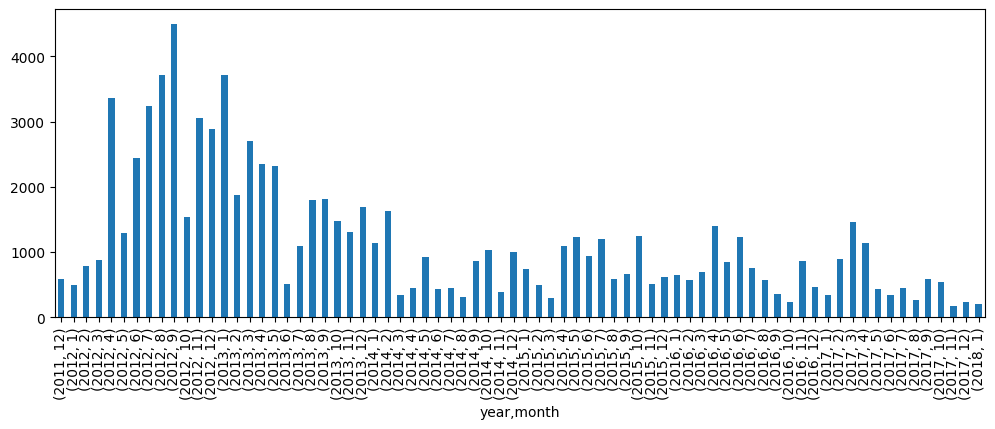

In [66]:
%matplotlib inline
#Plot the results stored in counts
counts.plot(kind='bar', figsize = (12,4))

From the bar plot, it can be observed that the most pull requests were made in September 2012 while November 2017 had the least pull requests.

* #### **Top 10 Files with the most Pull Requests**

In [67]:
#Count the number of pull requests, grouped by file
pr = data.groupby('file')['pid'].count()

In [68]:
#Sort pr by ascending order
pr = pr.sort_values(ascending=False)
pr

file
src/compiler/scala/tools/nsc/typechecker/Typers.scala    798
src/reflect/scala/reflect/internal/Types.scala           408
src/reflect/scala/reflect/internal/Symbols.scala         396
build.xml                                                386
src/compiler/scala/tools/nsc/Global.scala                340
                                                        ... 
test/files/pos/t1957.scala                                 1
test/files/pos/t1942.cmds                                  1
test/files/pos/t1786.scala                                 1
test/files/pos/t1785.scala                                 1
test/files/neg/t8044-b.check                               1
Name: pid, Length: 14992, dtype: int64

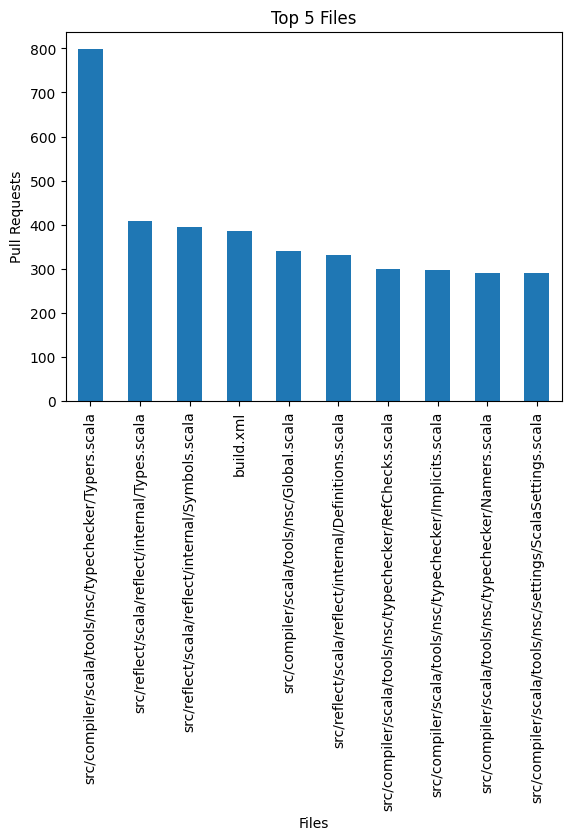

In [69]:
#Visualize the top 5 files via pull requests
pr[:10].plot(kind='bar')
plt.xlabel('Files')
plt.ylabel('Pull Requests')
plt.title('Top 5 Files')
plt.show()

It is observed that **src/compiler/scala/tools/nsc/typechecker/Typers.scala** has the most number of pull requests - **798**.

* #### **Top 10 Contributors to the Project**

In [70]:
#Count the number of pull requests, grouped by user
usr= data.groupby('user')['pid'].count()
usr

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64

In [71]:
#Sort users by ascending order
usr = usr.sort_values(ascending=False)
usr

user
xeno-by           12649
retronym          11430
paulp             11260
adriaanm           7722
lrytz              6988
                  ...  
iliffwes              1
jaceklaskowski        1
jacobsallan           1
jbdeboer              1
zuvizudar             1
Name: pid, Length: 464, dtype: int64

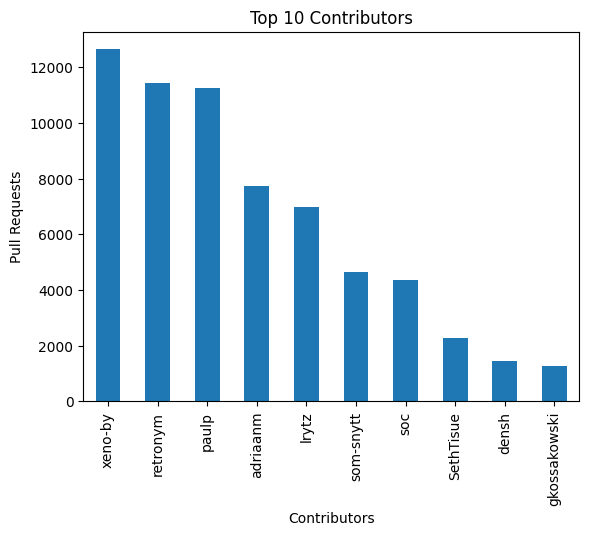

In [72]:

#Visualize the top 5 contributors via pull requests
usr[:10].plot(kind='bar')
plt.xlabel('Contributors')
plt.ylabel('Pull Requests')
plt.title('Top 10 Contributors')
plt.show()

It is observed that user **xeno-by** has created the most number of pull requests - **12649**.

* #### **Top Contributors to the Top 10 Files**

This question gives a clearer insight into the volume of contributions from the top 10 contributors.

In [73]:

#Identify the top 10 files with the most commits
files_10= pr[:10].reset_index()

#Extract the 
files_10 = files_10.iloc[:, 0]
files_10

0    src/compiler/scala/tools/nsc/typechecker/Typer...
1       src/reflect/scala/reflect/internal/Types.scala
2     src/reflect/scala/reflect/internal/Symbols.scala
3                                            build.xml
4            src/compiler/scala/tools/nsc/Global.scala
5    src/reflect/scala/reflect/internal/Definitions...
6    src/compiler/scala/tools/nsc/typechecker/RefCh...
7    src/compiler/scala/tools/nsc/typechecker/Impli...
8    src/compiler/scala/tools/nsc/typechecker/Namer...
9    src/compiler/scala/tools/nsc/settings/ScalaSet...
Name: file, dtype: object

In [74]:
#Extract data for the top 10 files from master df data
 
top10_files10 = data[data['file'].isin(files_10)]
top10_files10

,pid,user,date,file,month,year
51,11114584,xeno-by,2013-12-27 15:51:50+00:00,src/compiler/scala/tools/nsc/typechecker/Typer...,12,2013
65,11096632,xeno-by,2013-12-26 14:18:52+00:00,src/compiler/scala/tools/nsc/typechecker/Namer...,12,2013
66,11096632,xeno-by,2013-12-26 14:18:52+00:00,src/compiler/scala/tools/nsc/typechecker/Typer...,12,2013
68,11096632,xeno-by,2013-12-26 14:18:52+00:00,src/reflect/scala/reflect/internal/Symbols.scala,12,2013
84,11042476,retronym,2013-12-22 20:12:00+00:00,build.xml,12,2013
...,...,...,...,...,...,...
85525,11311477,som-snytt,2014-01-08 04:40:57+00:00,src/compiler/scala/tools/nsc/settings/ScalaSet...,1,2014
85534,11283803,retronym,2014-01-07 13:09:20+00:00,src/compiler/scala/tools/nsc/typechecker/Typer...,1,2014
85538,11245828,retronym,2014-01-06 10:30:44+00:00,src/compiler/scala/tools/nsc/typechecker/Typer...,1,2014
85540,11245823,retronym,2014-01-06 10:30:32+00:00,build.xml,1,2014


In [75]:
#Count the number of commits by contributor
top_10 = top10_files10.groupby('user')['pid'].count()

#Sort values in descending order
top_10= top_10.sort_values(ascending=False)

<AxesSubplot:xlabel='user'>

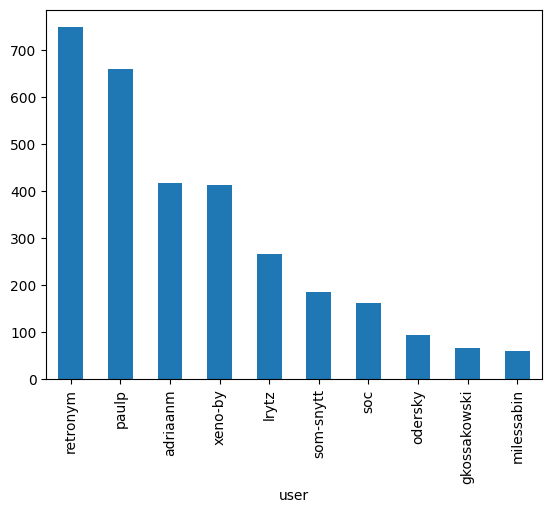

In [76]:
#Visualizing the Top 10 contributors to the top 10 files with the most commits
top_10[:10].plot(kind='bar')

It can be observed that although **xeno-by** is the top contributor for the entire project, **retronym** is the top contributor across the top 10 files with the most commits.

* #### **Is there camaraderie in the project?**

<p>A project with a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc.

However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.</p>

<p>In order to evaluate the dynamics of the community, a histogram of the number of pull requests submitted by each user is plotted. If only few people contribute a small number of pull requests it can be used as an indicator that the project is not welcoming of new contributors. </p>

In [77]:

# Group by the submitter
by_user = data.groupby('user').agg({'pid':'count'})
by_user

,pid
user,
0xmohit,2
193s,4
2m,20
4.00E+06,22
AlexeyIvanov8,2
...,...
yinxusen,1
yllan,4
ziggystar,22


array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

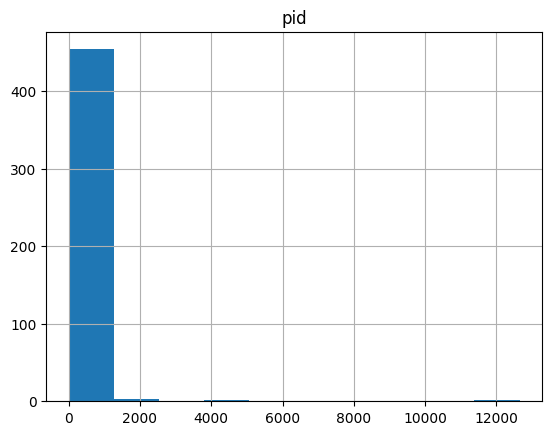

In [78]:
import matplotlib.pyplot as plt
# Required for matplotlib
%matplotlib inline

# Plot the histogram
by_user.hist()
# ... YOUR CODE FOR TASK 5 ...

It can be observed that indeed a significant number of people contribute pull requests. This indicates that the project is not restricted for new contributors.

* #### **Changed files in the last ten pull requests**

<p>Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. 

Therefore it is important to understand the parts of the system that have been recently changed. This makes it easy to pinpoint the "hot" areas of the code where most of the activity is happening.</p>

In [79]:
#Sorting the dataframe by date
sort= pulls.sort_values('date', ascending=False)

# Identify the last 10 pull requests
last_10 = sort.iloc[:10,:]
last_10

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
9,162011899,joroKr21,2018-01-10 00:45:57+00:00


In [80]:
lab_10 = pulls.nlargest(10, 'date')
lab_10

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
9,162011899,joroKr21,2018-01-10 00:45:57+00:00


In [81]:
#Merge last_10 and pull_files dataframe
joined_pr = last_10.merge(pull_files, on='pid')
joined_pr

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....


In [82]:
# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

* #### **Contributor with the most pull requests to a given file**

<p>When contributing to a project, some guidance and information regarding the codebase may be needed. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.</p>

<p><code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> has been identified as a top file being recently changed. The top 3 developers who changed that file will likely have the best understanding of the code.</p>

In [83]:
# This is the file we are interested in:
files = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [84]:
# Identify the commits that changed the file
file_pr = data[data['file'] == files]
file_pr

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
14970,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
17127,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
19174,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013
19834,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013


In [85]:
#Count the number of changes made by each developer
author_counts = file_pr.groupby('user')['pid'].count()

#Sort number of changes by user in descending order
author_counts = author_counts.sort_values(ascending=False)

In [86]:
# Print the top 3 developers
print(author_counts[:3])

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64


It can be observed that user **xeno-by** has made the most number of commits to the given file.

* #### **Contributors of the last ten pull requests on a given file**

<p>Sometimes, open source projects suffer from fluctuating membership. This makes the problem of finding the right person- knowledgeable and quite involved, more challenging. 

A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system. </p>
<p>Like in the previous task, we will look at the history of  <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p>

In [87]:
files = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [88]:
# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == files]

In [89]:
# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on='pid')

In [90]:
#Obtaining the last 10 most recent pull requests
userslast_10 = joined_pr.nlargest(10, 'date')
userslast_10

,pid,file,user,date
0,162838837,src/compiler/scala/reflect/reify/phases/Calcul...,zuvizudar,2018-01-14 19:16:16+00:00
1,22845163,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2014-10-16 10:23:42+00:00
2,12102550,src/compiler/scala/reflect/reify/phases/Calcul...,xeno-by,2014-02-01 01:19:58+00:00
3,10587633,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-12-06 10:04:43+00:00
4,5320191,src/compiler/scala/reflect/reify/phases/Calcul...,soc,2013-04-23 15:47:45+00:00
5,5291974,src/compiler/scala/reflect/reify/phases/Calcul...,bjornregnell,2013-04-22 13:56:06+00:00
6,5050360,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-04-09 06:13:57+00:00
7,5026775,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-04-08 07:07:45+00:00
8,4786005,src/compiler/scala/reflect/reify/phases/Calcul...,starblood,2013-03-25 02:48:48+00:00
9,4295399,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-02-24 21:43:43+00:00


In [91]:
#Unique value counts of pull requests per user in userslast_10

userslast_10.groupby('user')['pid'].count()

user
bjornregnell    1
retronym        5
soc             1
starblood       1
xeno-by         1
zuvizudar       1
Name: pid, dtype: int64

In [92]:
#Find the set of users from userslast_10 
users_last_10 = set(userslast_10['user'])
print(users_last_10)

{'starblood', 'soc', 'xeno-by', 'bjornregnell', 'retronym', 'zuvizudar'}


It can be observed that of the **10** most recent pull requests, only **6** contributors created the pull requests. **retronym** created **more than 1** pull request on this file.

* #### **Pull requests of two special developers**

<p>Now that two potential contacts in the projects have been identified, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. 

For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.</p>

In [93]:
# The developers we are interested in
authors = ['xeno-by', 'retronym']

In [94]:
# Get all pull requests by these developers
by_author = pulls[pulls['user'].isin(authors)]
by_author

,pid,user,date
7,11126653,xeno-by,2013-12-28 19:39:23+00:00
9,11121557,xeno-by,2013-12-27 23:50:56+00:00
10,11121465,xeno-by,2013-12-27 23:41:05+00:00
11,11121327,xeno-by,2013-12-27 23:25:52+00:00
12,11114584,xeno-by,2013-12-27 15:51:50+00:00
...,...,...,...
2895,11283803,retronym,2014-01-07 13:09:20+00:00
2896,11246145,retronym,2014-01-06 10:46:03+00:00
2897,11245828,retronym,2014-01-06 10:30:44+00:00
2898,11245823,retronym,2014-01-06 10:30:32+00:00


In [95]:
#Create a year column in the by_author dataframe
by_author['year'] = by_author['date'].dt.year

In [96]:
#Count the number of pull requests submitted each year
counts = by_author.groupby(['user', 'year']).agg({'pid': 'count'}).reset_index()
counts

,user,year,pid
0,retronym,2012,144
1,retronym,2013,336
2,retronym,2014,212
3,retronym,2015,120
4,retronym,2016,111
5,retronym,2017,107
6,xeno-by,2011,20
7,xeno-by,2012,271
8,xeno-by,2013,123
9,xeno-by,2014,60


In [97]:
# Convert the table to a wide format
counts_wide = counts.pivot_table(index='year', columns='user', values='pid', fill_value=0)
counts_wide

user,retronym,xeno-by
year,,
2011,0,20
2012,144,271
2013,336,123
2014,212,60
2015,120,3
2016,111,0
2017,107,0


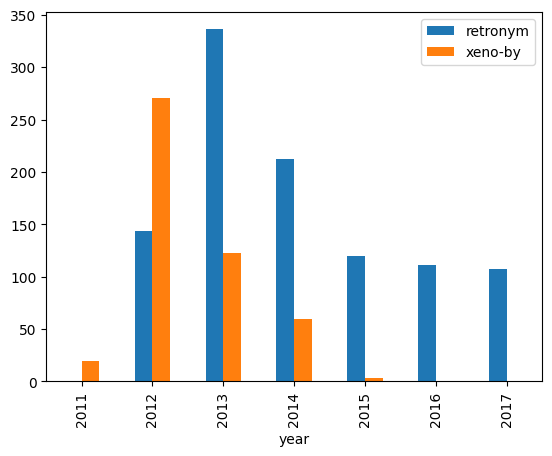

In [98]:
%matplotlib inline
# Plot the results
counts_wide.plot(kind='bar')
plt.legend(counts_wide.columns)
plt.show()

# ... YOUR CODE FOR TASK 9 .

From the bar plot above, it is observed that contributor **retronym** had a higher volume of contribution across the entire project between **2013** to **2017** based on the number of pull requests. 

However, this was quite low between  **2011** and **2012** with this user having very little or no contribution to the project compared to **xeno-by**.

* #### **Contributions per contributor**
<p>

As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) 

In this case, we would measur which of these two developers of interest have the most experience with the code in a given file. Experience will be measured by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.</p>

In [104]:
authors = ['xeno-by', 'retronym']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]
by_author

,pid,user,date,file,month,year
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,12,2013
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,12,2013
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,12,2013
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,12,2013
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,12,2013
...,...,...,...,...,...,...
85572,11245823,retronym,2014-01-06 10:30:32+00:00,test/files/presentation/t8085b/src/p1/nodescal...,1,2014
85573,11245823,retronym,2014-01-06 10:30:32+00:00,test/files/presentation/t8085b/src/p1/nodescal...,1,2014
85574,11245823,retronym,2014-01-06 10:30:32+00:00,test/files/run/large_code.check,1,2014
85575,11245823,retronym,2014-01-06 10:30:32+00:00,test/files/run/large_code.scala,1,2014


In [105]:
# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]
by_file[:5]

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
17127,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
35498,2072662,xeno-by,2012-08-16 05:39:22+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012


In [106]:
# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', 'year'])['pid'].count().reset_index()
grouped

,user,year,pid
0,retronym,2013,4
1,retronym,2014,1
2,xeno-by,2012,10
3,xeno-by,2014,1


In [107]:
# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='year', columns = 'user', values='pid', fill_value=0)
by_file_wide

user,retronym,xeno-by
year,,
2012,0,10
2013,4,0
2014,1,1


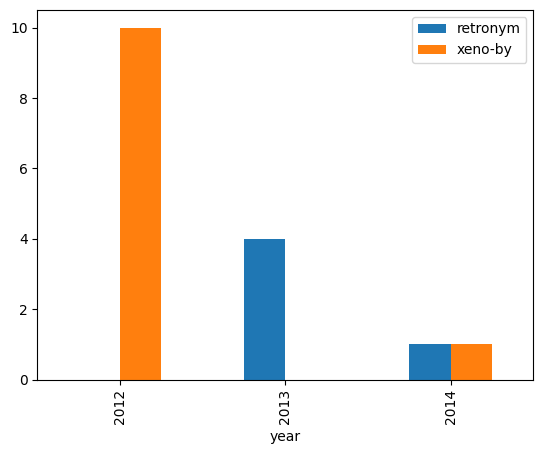

In [108]:
# Plot the results
by_file_wide.plot(kind='bar')
plt.legend(by_file_wide.columns)
plt.show()

For this file of interest, it is observed that pull requests were only created between **2012** and **2014**  for the selected file. It can also be seen that both developers actively contributed to this file via pull requests in **2014**. 

However, in earlier years only one of each developer made active contributions with user **xeno-by** having made the most contributions to this file.

## **Conclusion**

* The Scala project is an active project which is quite open to new contributions from contributors.
* For questions or information regarding the project or already existing code, users **retronym** and **xeno-by** are the best options.